# Assignment 1 - Question 3
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_A1_Q3.ipynb`.

## 1.3.0 Background about the dataset

TLDR: You have 25 independent variables (`x1, x2, x3, ... , x25`) type: `float` for each data point. You can use a linear combination of these 25 independent variables to predict the y (dependent variable) of each data point.

In [45]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt

In [66]:
train_data = list()
with open('train_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                       float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        train_data.append(data_point)
        
# each point in x_train has 25 values - 1 for each feature
x_train = [x[0] for x in train_data]
# each point in y_train has 1 value - the 'y' of the molecule
y_train = [x[1] for x in train_data]


test_data = list()
with open('test_q3.csv', 'r') as infile:
    input_rows = csv.DictReader(infile)
    for row in input_rows:
        data_point = ([float(row['x1']), float(row['x2']), float(row['x3']),
                        float(row['x4']), float(row['x5']), float(row['x6']),
                        float(row['x7']), float(row['x8']), float(row['x9']),
                        float(row['x10']), float(row['x11']), float(row['x12']),
                        float(row['x13']), float(row['x14']), float(row['x15']),
                        float(row['x16']), float(row['x17']), float(row['x18']),
                        float(row['x19']), float(row['x20']), float(row['x21']),
                        float(row['x22']), float(row['x23']), float(row['x24']),
                        float(row['x25'])], float(row['y']))
        test_data.append(data_point)

x_test = [x[0] for x in test_data]
y_test = [x[1] for x in test_data]


# 240 x 25

### 1.3.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

1.3.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

1.3.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

1.3.2.3 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

1.2.1.4 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

<!-- your answer to 1.3.1.1 -->
`ANSWER 1.3.1.1`

The function we are trying to model is $AX = Y_{pred}$

Using the L2 norm as our cost, we define our cost function as follows:

$J(X) = (Y_{pred} - Y)^{T}(Y_{pred} - Y) = (AX - Y)^{T}(AX - Y)$

<br>
Deriving this w.r.t X, we get:

$\huge \frac{\partial J(X)}{\partial X} = A^{T}AX - A^{T}Y$ 

<br>

Using this formulation for the derivative, we update our estimate for X with the scheme:

$\large X_{n+1} = X_{n} - \lambda \frac{\partial J(X)}{\partial X}$

where $\lambda$ is our learning rate.

<br>

I will use batch processing since the dataset is small enough

We initialise our values for A as zeros. Since the cost function is convex, it will converge eventually and starting choice is not as important.
A small portion of the training dataset is designated as the validation dataset. Once the MSE on the validation dataset increases, we stop training early to prevent overfitting.

In [230]:
# 1.3.1.2
# implement Linear Regression

from time import time

def linearRegression(xData, yData, maxIter=5, learningRate=0.1, displayRate=20):
    # b = np.zeros((25, 1), dtype=np.float64)
    # b[0:5] = [[-5], [1.5], [-1.5], [-1.5], [1.5]]

    b = np.random.uniform(-1.0, 1.0, (25,1))

    seed = 12345

    # load and split data
    validationPercent = 0.05
    allData = np.array(xData)       # x values
    allGT = np.array(yData)         # y values

    np.random.seed(seed)
    np.random.shuffle(allData)
    np.random.seed(seed)
    np.random.shuffle(allGT)

    allGT = allGT.reshape(-1, 1)

    trainData = allData[: int((1-validationPercent) * allData.shape[0]), :]
    validationData = allData[int((1-validationPercent) * allData.shape[0]):, :]


    trainGT = allGT[:int((1-validationPercent) * allGT.shape[0]), :]
    validationGT = allGT[int((1-validationPercent)* allGT.shape[0]):, :]

    print(trainData.shape, validationData.shape, trainGT.shape, validationGT.shape)

    def getMSE(b: np.ndarray, X: np.ndarray, Y: np.ndarray):
        return np.sqrt(np.sum(np.square(X@b - Y)))
    
    def getJacobian(b: np.ndarray, X: np.ndarray, Y: np.ndarray):
        k = X.T@X@b
        l = X.T@Y
        ans = k - l
        # print("Jacobian: ", ans, ans.shape) 
        return ans
    
    # begin iterating
    
    print("Initial")

    print("Train MSE: ", getMSE(b,trainData,trainGT))
    print("Validation MSE: ", getMSE(b,validationData,validationGT))
    print()
    
    prevTrainMSE = np.inf
    prevValidationMSE = np.inf
    for iterNum in range(1,maxIter):

        b -= learningRate * getJacobian(b, trainData, trainGT)
        
        cntTrainMSE = getMSE(b,trainData,trainGT)
        cntValidationMSE = getMSE(b,validationData,validationGT)

        if (iterNum % displayRate) == 0:
            print("Iteration: ", iterNum, " | Train MSE: ", cntTrainMSE, " | Validation MSE: ", cntValidationMSE)

        # if cntValidationMSE >= prevValidationMSE:
        #     print("Iteration: ", iterNum, " | Train MSE: ", cntTrainMSE, " | Validation MSE: ", cntValidationMSE)
        #     break
        else:
            prevTrainMSE = cntTrainMSE
            prevValidationMSE = cntValidationMSE

    return b

b = linearRegression(xData=x_train, yData=y_train, maxIter=21,learningRate=0.01)

# Train MSE:  57.67729059539985  | Validation MSE:  4.549521266916086 (without early stoppage)

(228, 25) (12, 25) (228, 1) (12, 1)
Initial
Train MSE:  38.27398504417177
Validation MSE:  9.581516548131335

Iteration:  20  | Train MSE:  9.492877733471277  | Validation MSE:  2.311863994233423


In [203]:
# 1.3.2.3
# try with different learning rates and choose the best one
b = linearRegression(xData=x_train, yData=y_train, maxIter=21,learningRate=0.00001)

(228, 25) (12, 25) (228, 1) (12, 1)
Initial
Train MSE:  18.5272680488862
Validation MSE:  4.517914347175892

Iteration:  4  | Train MSE:  18.464421892508135  | Validation MSE:  4.497498553124866
Iteration:  8  | Train MSE:  18.40225194651817  | Validation MSE:  4.477319866366874
Iteration:  12  | Train MSE:  18.340752109060077  | Validation MSE:  4.457376355180858
Iteration:  16  | Train MSE:  18.279916311434008  | Validation MSE:  4.437666093561841
Iteration:  20  | Train MSE:  18.21973851811334  | Validation MSE:  4.418187161208046


In [244]:
# The best result seems to be 0.001
b = linearRegression(xData=x_train, yData=y_train, maxIter=140,learningRate=0.001)
print("\nBest lambda: ", 0.001)

(228, 25) (12, 25) (228, 1) (12, 1)
Initial
Train MSE:  38.27398504417177
Validation MSE:  9.581516548131335

Iteration:  20  | Train MSE:  21.325473040439974  | Validation MSE:  6.0143940584270545
Iteration:  40  | Train MSE:  15.450832453868543  | Validation MSE:  4.0916412565800995
Iteration:  60  | Train MSE:  12.718953000888131  | Validation MSE:  3.1904304151730725
Iteration:  80  | Train MSE:  11.385268823126312  | Validation MSE:  2.764749462198057
Iteration:  100  | Train MSE:  10.661529504645163  | Validation MSE:  2.5483683316167545
Iteration:  120  | Train MSE:  10.225067200482416  | Validation MSE:  2.4309691950043546

Best lambda:  0.001


(25, 1) (60, 25)
(240, 1)


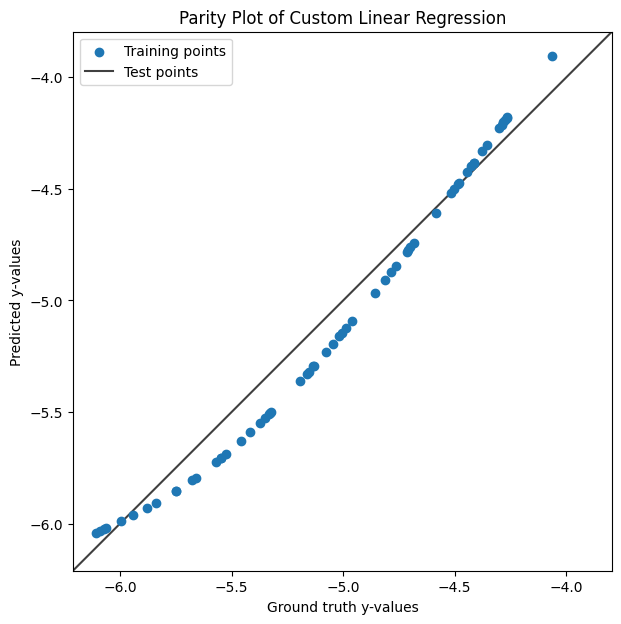

In [245]:
# 1.3.1.4
# Get the predictions of x_test into `y_pred`

fig, ax = plt.subplots(figsize=(7,7))

allTestX = np.array(x_test)       # x values

print(b.shape, allTestX.shape)
y_pred = allTestX@b

sanity = np.array(x_train)@b
print(sanity.shape)

# ax.scatter(y_train, sanity)
ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')

ax.legend(["Training points", "Test points"])

print("Due to no overlap between the y values from test and training, the training data does not accurately represent samples from the test data. Thus, validation values proved to be useful. If max iterations ")

plt.show()

### 1.3.2 Implement Ridge Regression

1.3.2.1 Explain Ridge regression briefly in 1-2 lines.

1.3.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do?

1.3.2.3 How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

1.3.2.4 Make a Parity Plot of Ridge Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.2.1 -->
`1.3.2.1 Answer`



We add an extra term to the cost function $\alpha * ||w||_{2}$ that penalises high values of weights. The higher the value of alpha, the more higher weights are penalied. 

In [256]:
# 1.3.3.2
from sklearn.linear_model import Ridge

y_pred = []
print("Ridge regression values:")
for alpha in [1e-15, 1e-10, 1e-9, 1e-8, 1e-7, 1e-6]:
    model = Ridge(alpha=alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Alpha: {}\t RMSE:{}".format(alpha,np.sqrt(np.sum((y_pred - y_test)**2)/len(y_pred))))



Ridge regression values:
Alpha: 1e-15	 RMSE:2.6299444872172067e-05
Alpha: 1e-10	 RMSE:0.0018564370790347983
Alpha: 1e-09	 RMSE:0.005761528058065159
Alpha: 1e-08	 RMSE:0.009787544014156435
Alpha: 1e-07	 RMSE:0.020284045465683145
Alpha: 1e-06	 RMSE:0.04322877011591955


<!-- Your answer to 1.3.2.3 -->
`1.3.2.3 Answer`

This prevents the model from overfitting as features are discouraged from having large magnitude values. Thus, only the minimum required amount of features have non zero or large values, decreasing the order of the hyperplane plane generated. Since the hyperplane is less complex, it its less likely to overfit to training points. Thus, ridge regression can help prevent overfitting.

Since the test data does not overlap with the training data, the fact that the model accurately predicts values indicates that it has not overfit and has generalised well. Thus, the RMSE decreases. Very low values of alpha are enough due to the low variance in data. Sklearns optimisation takes care of the rest

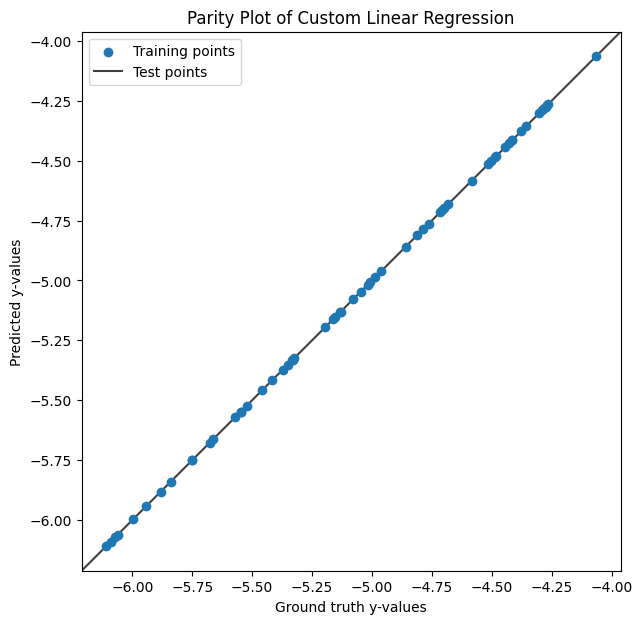

In [251]:
# 1.3.2.4
model = Ridge(alpha=1e-15)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')

ax.legend(["Training points", "Test points"])

### 1.3.3 Implement Lasso Regression
1.3.3.1 Explain Lasso regression briefly in 1-2 lines.

1.3.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha.

1.3.3.3 What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

1.3.3.4 Make a Parity Plot of Lasso Regression model's y-predictions on the test set with the actual values.

<!-- Your answer to 1.3.3.1 -->
`1.3.3.1 Answer`

Lasso regression is ridge regression using an L1 norm for the alpha term.

In [282]:
# 1.3.3.2
from sklearn.linear_model import Lasso

y_pred = []
print("Lasso regression values:")
for alpha in [1e-5, 1e-4, 1e-3, 867e-5, 1e-2, 3e-2 ,1e-1, 0.2]:
    model = Lasso(alpha=alpha)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("Alpha: {}\t RMSE:{}".format(alpha,np.sqrt(np.sum((y_pred - y_test)**2)/len(y_pred))))



Lasso regression values:
Alpha: 1e-05	 RMSE:0.44189519197113886
Alpha: 0.0001	 RMSE:0.6124899982744757
Alpha: 0.001	 RMSE:0.17966732847322867
Alpha: 0.00867	 RMSE:0.029915900482172058
Alpha: 0.01	 RMSE:0.042419962550167355
Alpha: 0.03	 RMSE:0.12185681492530755
Alpha: 0.1	 RMSE:0.4143688074221509
Alpha: 0.2	 RMSE:0.8415466533774938


<!-- Your answer to 1.3.3.3 -->
`1.3.3.3 Answer`

Alpha controls how much the magnitudes of the weights are penalised. An L1 norm penalises weights in (-1,1) more than those outside (-1,1). Due to the usage of an L1 norm, it is more likely to set parameters to zero directly. Since weights outside (-1,1) are penalised less, higher values of alpha are needed for Lasso regression as compared to Ridge. Due to low variance in the data, it doesnt perform as well.

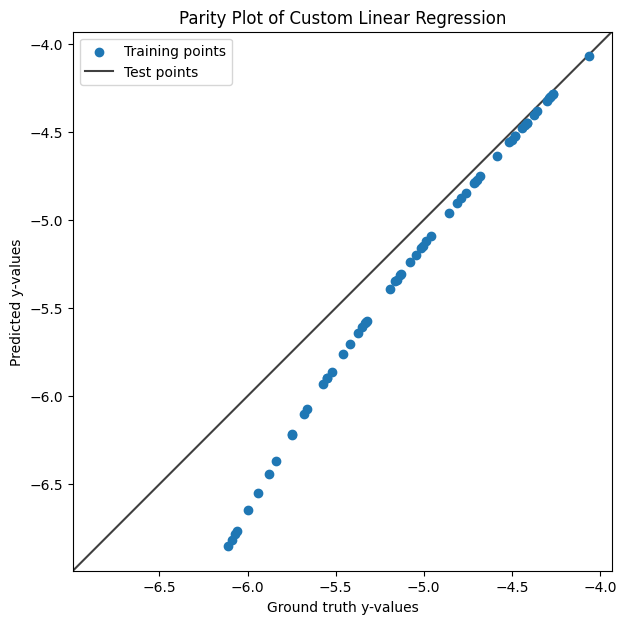

In [283]:

# 1.3.3.4# 1.3.2.4
model = Ridge(alpha=867e-5)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth y-values')
ax.set_ylabel('Predicted y-values')

ax.legend(["Training points", "Test points"])